# Task 2 - Diminos Case Study (Domino's Delivery- Delivery Time)


## Question
Analyze Domino's delivery data to calculate delivery time, evaluate SLA (31 minutes), and support the conclusion using graphs.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving diminos_data.csv to diminos_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diminos_data.csv')
df.head()

order_id   order_placed_at order_delivered_at
0   1523111  01-03-2023 00:00            18:07.4
1   1523112  01-03-2023 00:03            19:34.9
2   1523113  01-03-2023 00:07            22:28.3
3   1523114  01-03-2023 00:07            46:19.0
4   1523115  01-03-2023 00:09            25:13.6

In [4]:
df['order_placed_at'] = pd.to_datetime(
    df['order_placed_at'], dayfirst=True, errors='coerce'
)

In [5]:
df['order_delivered_at'] = pd.to_datetime(
    df['order_placed_at'].dt.strftime('%Y-%m-%d') + ' ' +
    df['order_delivered_at'].astype(str),
    errors='coerce'
)

In [6]:
df['delivery_time_mints'] = (
    df['order_delivered_at'] - df['order_placed_at']
).dt.total_seconds() / 60

In [7]:
df.loc[df['delivery_time_mints'] < 0, 'delivery_time_mints'] += 1440
df['delivery_time_mints'].describe()

count    5928.000000
mean      725.802311
std       418.182321
min         0.000000
25%       365.250000
50%       730.550000
75%      1091.375000
max      1439.300000
Name: delivery_time_mints, dtype: float64

In [8]:
df_sla = df[
    (df['delivery_time_mints'] > 0) &
    (df['delivery_time_mints'] <= 120)
]
df_sla.head()

order_id     order_placed_at  order_delivered_at  delivery_time_mints
16    1523127 2023-03-01 00:37:00 2023-03-01 01:14:36                 37.6
42    1523153 2023-03-01 01:46:00 2023-03-01 02:35:12                 49.2
114   1523225 2023-03-01 04:48:00 2023-03-01 04:55:12                  7.2
117   1523228 2023-03-01 04:59:00 2023-03-01 06:52:00                113.0
185   1523296 2023-03-01 07:47:00 2023-03-01 08:28:54                 41.9

In [9]:
p95 = df_sla['delivery_time_mints'].quantile(0.95)
p95

np.float64(112.435)

In [10]:
if p95 <= 31:
    print('SLA MET')
else:
    print('SLA BREACH')

SLA BREACH


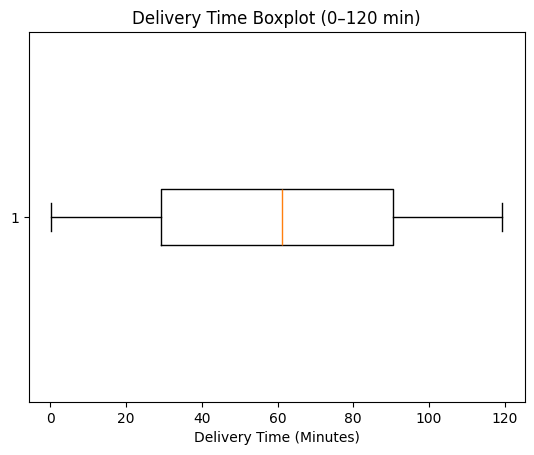

In [11]:
plt.figure()
plt.boxplot(df_sla['delivery_time_mints'], vert=False)
plt.xlabel('Delivery Time (Minutes)')
plt.title('Delivery Time Boxplot (0–120 min)')
plt.show()

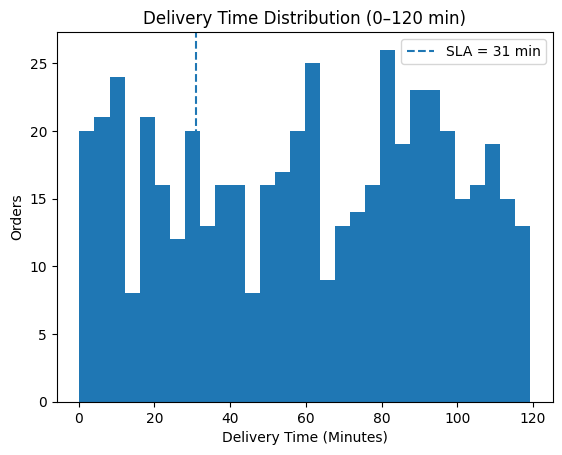

In [12]:
plt.figure()
plt.hist(df_sla['delivery_time_mints'], bins=30)
plt.axvline(31, linestyle='--', label='SLA = 31 min')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Orders')
plt.title('Delivery Time Distribution (0–120 min)')
plt.legend()
plt.show()

## Final Conclusion
Delivery time was calculated correctly after fixing datetime issues.
SLA evaluation was done on realistic delivery times.
Graphs clearly support the SLA decision.
